# **Image Classification: US License Plates**
## **Background information:**
This project consists of a very high-quality dataset, US license plate images from 50 states i.e., total 50 classes for classification. Based on the information provided, all images are originals, no augmented images are present in the dataset. All images are of size 128 pixels X 224 pixels X 3 channels in jpg format. All images have been cropped so the license plate occupies at least 90% of the pixels in any image. This ensures that even simple models will achieve high training, validation and test accuracy. Also included is a csv file that can be used to create train, validation and test sets if desired.

## **Dataset source:**
https://www.kaggle.com/datasets/gpiosenka/us-license-plates-image-classification

## **Criteria for success:**
Delivering a model with > 90% accuracy to classify a license plate image into one of different available 50 classes.






## **Data Wrangling**

In [5]:
# Import relevant python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # Operating system module for handling file paths


In [24]:
# Checking dataset information provided in the CSV file
labels_df = pd.read_csv("drive/MyDrive/DSC Capstone 3/plates/plates.csv")
print(labels_df.info())
print('\n', labels_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   7860 non-null   int64 
 1   filepaths  7860 non-null   object
 2   labels     7860 non-null   object
 3   data set   7860 non-null   object
dtypes: int64(1), object(3)
memory usage: 245.8+ KB
None

    class id              filepaths   labels data set
0         0  train/ALABAMA/001.jpg  ALABAMA    train
1         0  train/ALABAMA/002.jpg  ALABAMA    train
2         0  train/ALABAMA/003.jpg  ALABAMA    train
3         0  train/ALABAMA/004.jpg  ALABAMA    train
4         0  train/ALABAMA/005.jpg  ALABAMA    train


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7360 entries, 0 to 7359
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   7360 non-null   int64 
 1   filepaths  7360 non-null   object
 2   labels     7360 non-null   object
 3   data set   7360 non-null   object
dtypes: int64(1), object(3)
memory usage: 287.5+ KB
None

First Few Rows:
   class id              filepaths   labels data set
0         0  train/ALABAMA/001.jpg  ALABAMA    train
1         0  train/ALABAMA/002.jpg  ALABAMA    train
2         0  train/ALABAMA/003.jpg  ALABAMA    train
3         0  train/ALABAMA/004.jpg  ALABAMA    train
4         0  train/ALABAMA/005.jpg  ALABAMA    train

NOTE: The Average Number of License Plate Images per State is 147
NOTE: The Maximum Number of License Plate Images per State is 175 in state: MARYLAND
NOTE: The Minimum Number of License Plate Images per State is 121 in state: OREGON 



<Axes: >

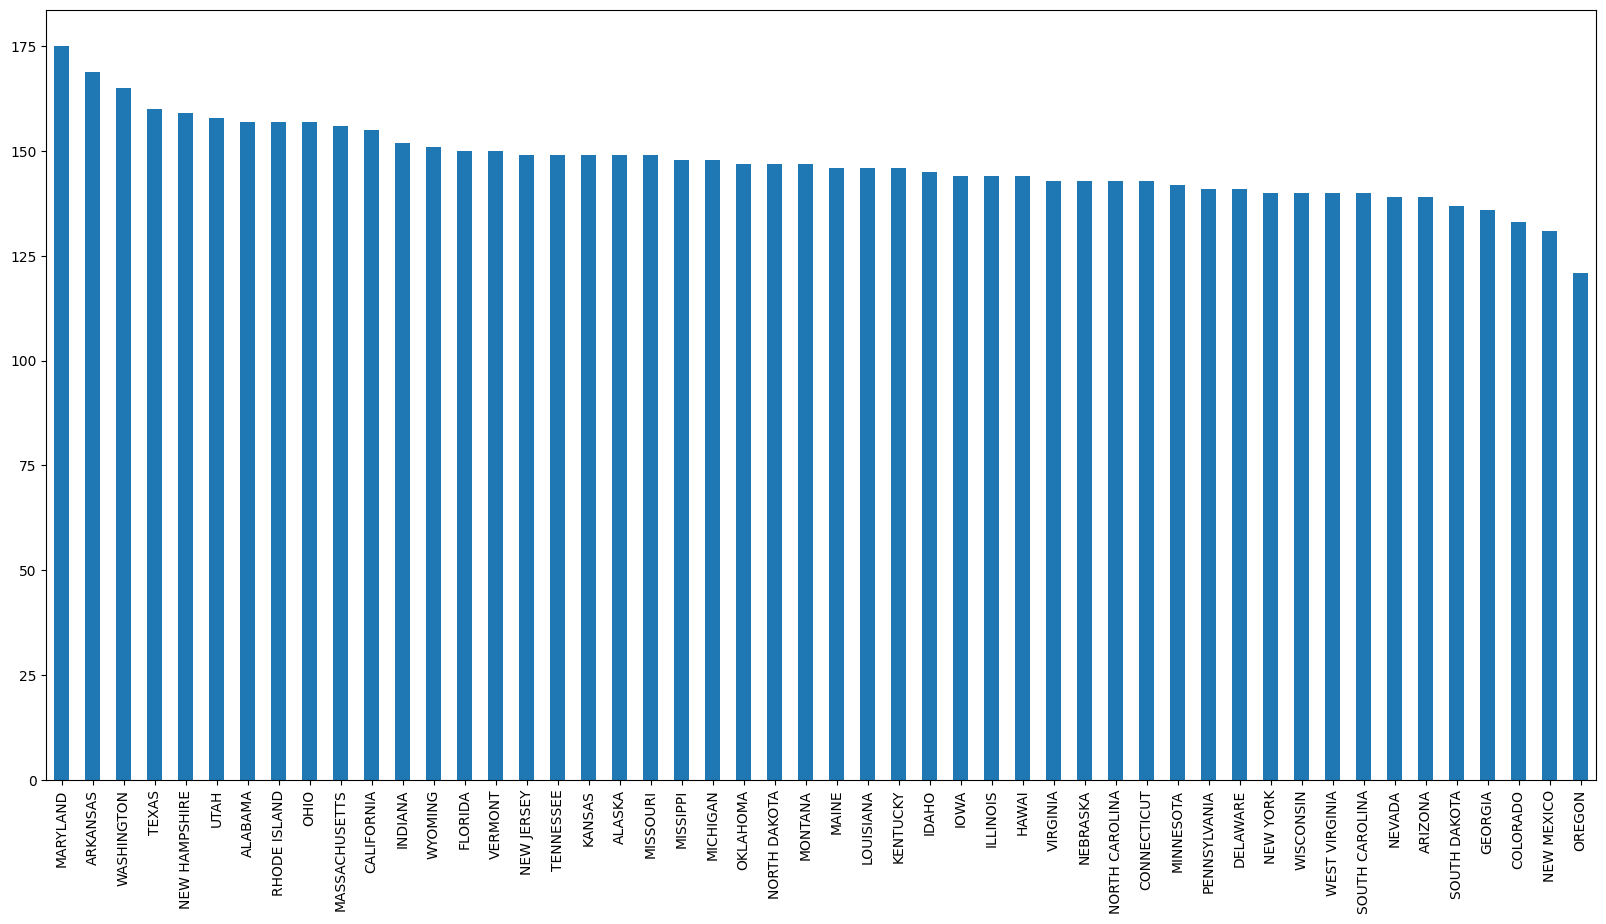

In [32]:
# Subsetting training dataset based on the information provided in the CSV file
labels_train_df = labels_df[labels_df['data set'] == 'train']

# Display information about the DataFrame
print("DataFrame Information:")
print(labels_train_df.info())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(labels_train_df.head())

# Calculate label counts
label_counts = labels_train_df['labels'].value_counts()

# Print statistics about the distribution of license plate images per state
print("\nNOTE: The Average Number of License Plate Images per State is", round(label_counts.mean()))
print("NOTE: The Maximum Number of License Plate Images per State is", round(label_counts.max()), "in state:", label_counts.idxmax())
print("NOTE: The Minimum Number of License Plate Images per State is", round(label_counts.min()), "in state:", label_counts.idxmin(), '\n')

labels_train_df['labels'].value_counts(ascending=False).plot.bar(figsize=(20, 10)) # Bar chart to check # of license plate images per per state based on CSV file

In [34]:
# Creating a dictionary to save the state's name and # of license plate images as keys and values respectively based on the CSV file information
image_csv = labels_train_df.labels.value_counts(ascending=False)
image_csv_dict = license_plate_image_csv.to_dict()
print(image_csv_dict)

{'MARYLAND': 175, 'ARKANSAS': 169, 'WASHINGTON': 165, 'TEXAS': 160, 'NEW HAMPSHIRE': 159, 'UTAH': 158, 'ALABAMA': 157, 'RHODE ISLAND': 157, 'OHIO': 157, 'MASSACHUSETTS': 156, 'CALIFORNIA': 155, 'INDIANA': 152, 'WYOMING': 151, 'FLORIDA': 150, 'VERMONT': 150, 'NEW JERSEY': 149, 'TENNESSEE': 149, 'KANSAS': 149, 'ALASKA': 149, 'MISSOURI': 149, 'MISSIPPI': 148, 'MICHIGAN': 148, 'OKLAHOMA': 147, 'NORTH DAKOTA': 147, 'MONTANA': 147, 'MAINE': 146, 'LOUISIANA': 146, 'KENTUCKY': 146, 'IDAHO': 145, 'IOWA': 144, 'ILLINOIS': 144, 'HAWAI': 144, 'VIRGINIA': 143, 'NEBRASKA': 143, 'NORTH CAROLINA': 143, 'CONNECTICUT': 143, 'MINNESOTA': 142, 'PENNSYLVANIA': 141, 'DELAWARE': 141, 'NEW YORK': 140, 'WISCONSIN': 140, 'WEST VIRGINIA': 140, 'SOUTH CAROLINA': 140, 'NEVADA': 139, 'ARIZONA': 139, 'SOUTH DAKOTA': 137, 'GEORGIA': 136, 'COLORADO': 133, 'NEW MEXICO': 131, 'OREGON': 121}


In [35]:
# Counting the actual # of license plate images for each state present in the folder to match the information provided in the CSV file
# Defining a function to count the # of images in each folder and save these information as key and values in another dictionary
def count_images_states(directory_path):
    image_counts = {}  # Dictionary to store folder names and file counts

    # Iterate over each folder in the specified directory
    for folder_name in os.listdir(directory_path):
        folder_path = os.path.join(directory_path, folder_name)
        file_count = len(os.listdir(folder_path))
        image_counts[folder_name] = file_count

    # folder_file_counts_df = pd.DataFrame(list(folder_file_counts.items()), columns=['Folder', 'Number_of_files'])
    return image_counts

# Calling the function by providing the directory path containing the relevant data
image_counts_folder = count_images_states('drive/MyDrive/DSC Capstone 3/plates/train')

# Checking if # of image files in the folder match the CSV file data
if (image_csv_dict == image_counts_folder):
    print("The data are CONSISTENT between CSV file and images folder for different states")
else:
    print("The data are INCONSISTENT between CSV file and images folder for different states")

The data are CONSISTENT between CSV file and images folder for different states


ALABAMA


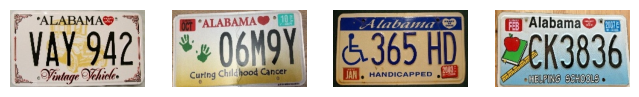

ALASKA


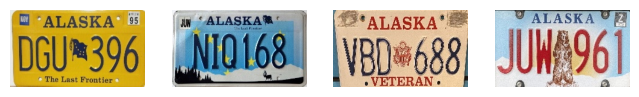

ARIZONA


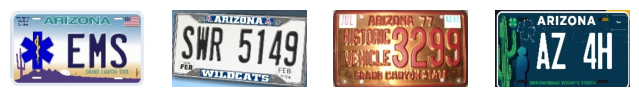

ARKANSAS


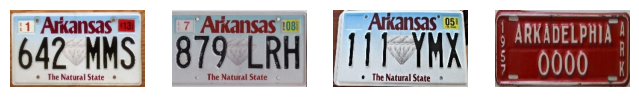

CALIFORNIA


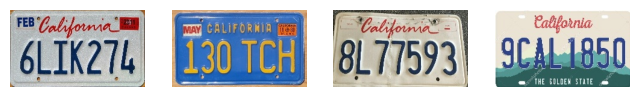

COLORADO


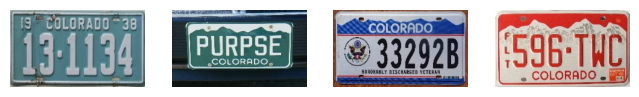

CONNECTICUT


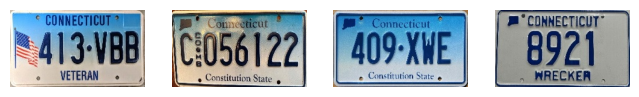

DELAWARE


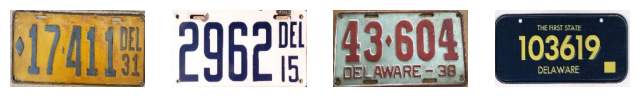

FLORIDA


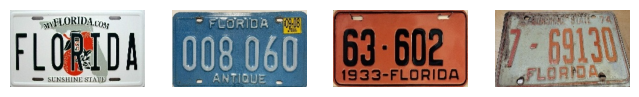

GEORGIA


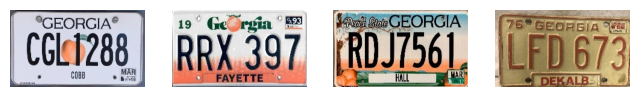

HAWAI


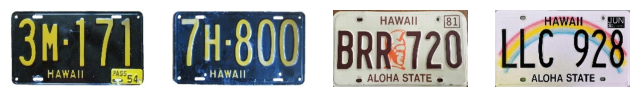

IDAHO


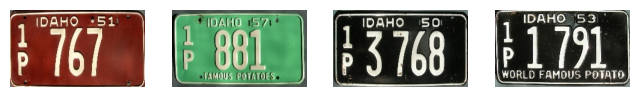

ILLINOIS


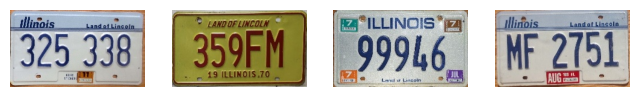

INDIANA


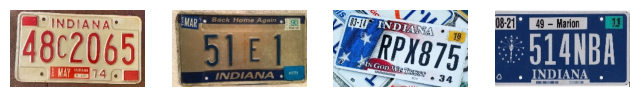

IOWA


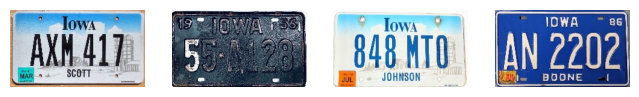

KANSAS


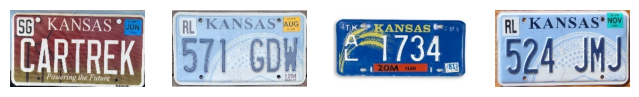

KENTUCKY


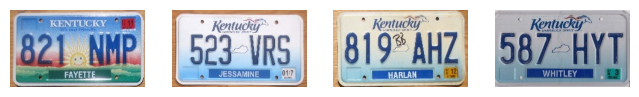

LOUISIANA


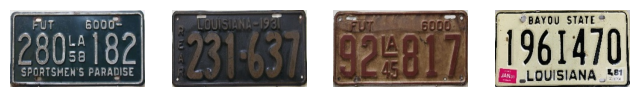

MAINE


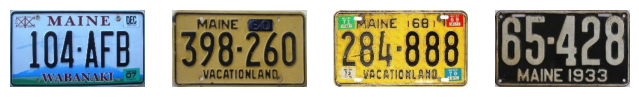

MARYLAND


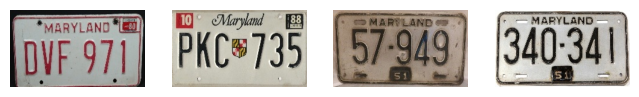

MASSACHUSETTS


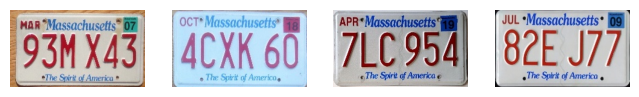

MICHIGAN


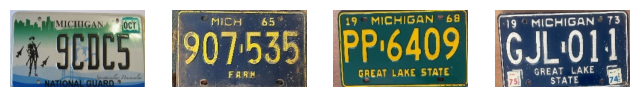

MINNESOTA


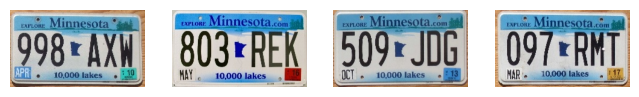

MISSIPPI


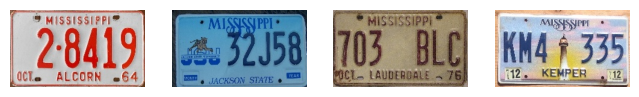

MISSOURI


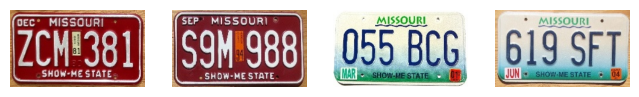

MONTANA


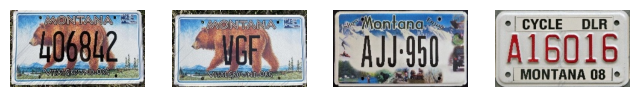

NEBRASKA


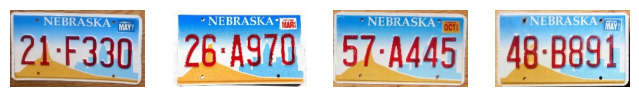

NEVADA


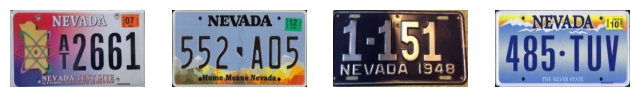

NEW HAMPSHIRE


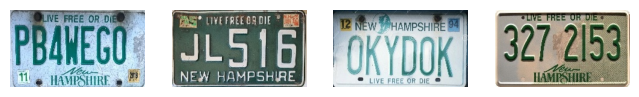

NEW JERSEY


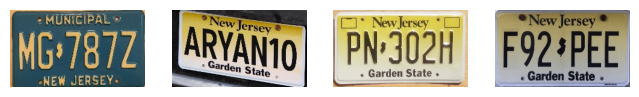

NEW MEXICO


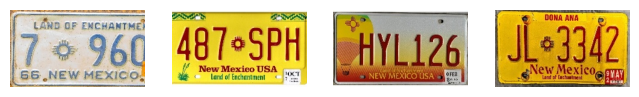

NEW YORK


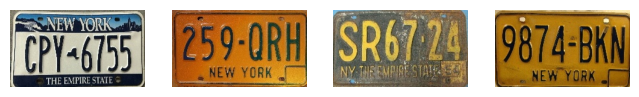

NORTH CAROLINA


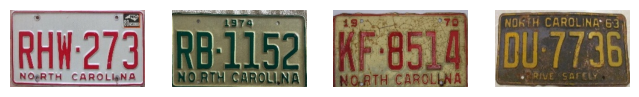

NORTH DAKOTA


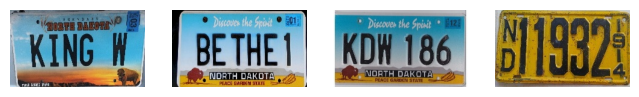

OHIO


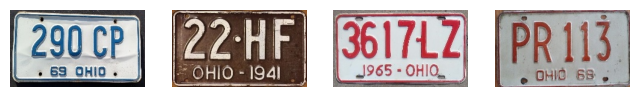

OKLAHOMA


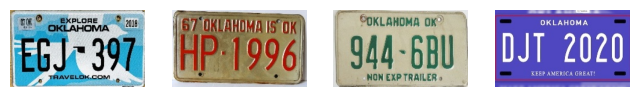

OREGON


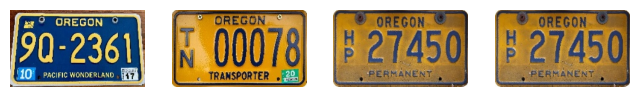

PENNSYLVANIA


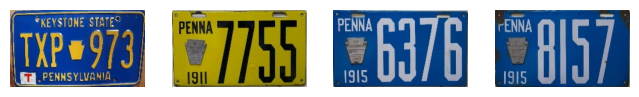

RHODE ISLAND


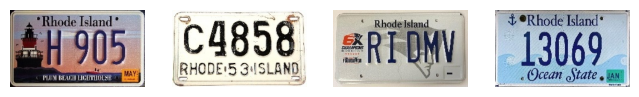

SOUTH CAROLINA


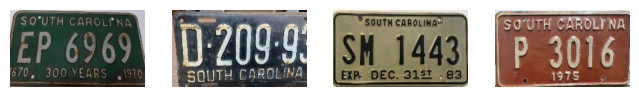

SOUTH DAKOTA


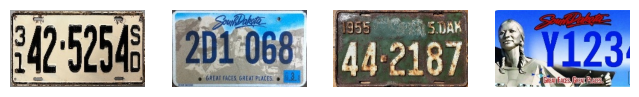

TENNESSEE


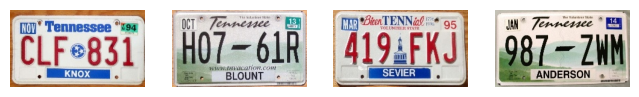

TEXAS


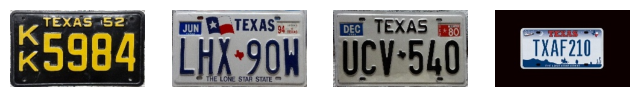

UTAH


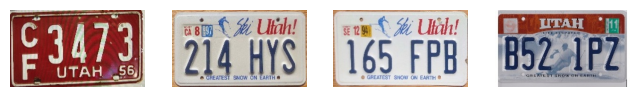

VERMONT


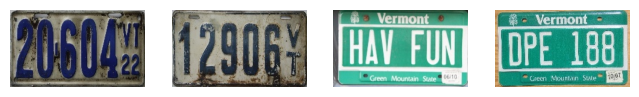

VIRGINIA


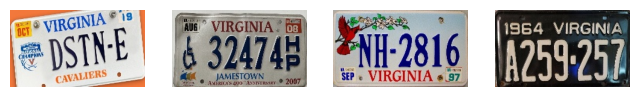

WASHINGTON


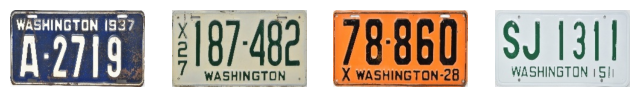

WEST VIRGINIA


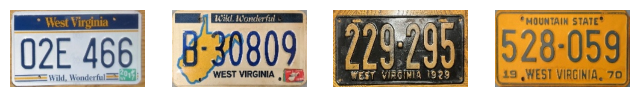

WISCONSIN


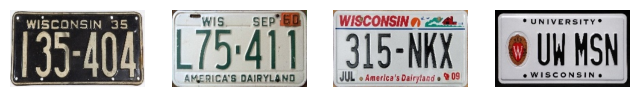

WYOMING


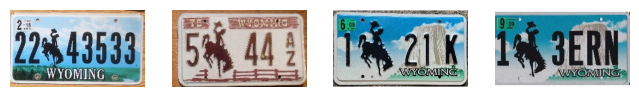

In [36]:
# Data visualization
data_dir = 'drive/MyDrive/DSC Capstone 3/plates/train'

# Loop over folders in the data directory
for state_folder in sorted(os.listdir(data_dir)):
    print(state_folder)

    # Create a new figure for each folder
    plt.figure(figsize=(8, 1))

    # Loop over the first 4 license plate images in each state folder
    for i in range(4):
        # Create a subplot in a 1x4 grid
        ax = plt.subplot(1, 4, i + 1)

        # Construct the path to the image file
        file_name = f"{str(i + 1).zfill(3)}.jpg"  # Based on file names from "001.jpg" to "1XX.jpg inside a state folder"
        image_path = os.path.join(data_dir, state_folder, file_name)

        # Read and display the image
        read_image = plt.imread(image_path)
        plt.imshow(read_image)

        # Turn off axis labels
        ax.axis('off')

    # Show the plot for each folder
    plt.show()